In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px
# Styling 
plt.style.use('fivethirtyeight')

In [3]:
raw_df = pd.read_csv('CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1) 
raw_df.fillna(method ='ffill', inplace = True) 

In [4]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.489949,-0.679976
1,-0.519100,0.544827


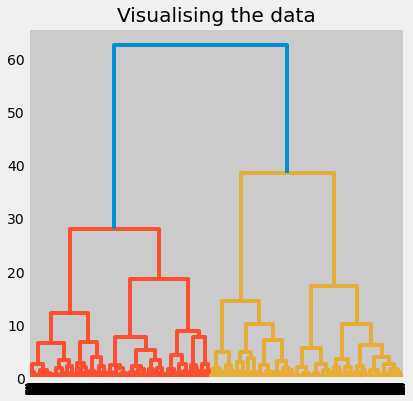

In [24]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

In [36]:
silhouette_scores = {}
method = "ward"

for n_cluster in range(2, 8):
    silhouette_scores[n_cluster] = silhouette_score(X_principal, AgglomerativeClustering(linkage = method, n_clusters = n_cluster).fit_predict(X_principal))

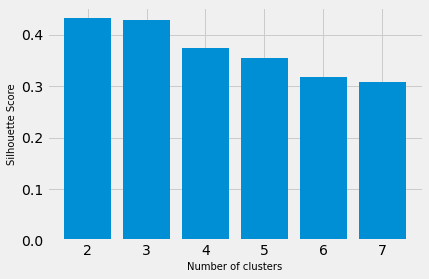

In [37]:
# Plotting a bar graph to compare the results 
plt.bar(silhouette_scores.keys(), silhouette_scores.values()) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

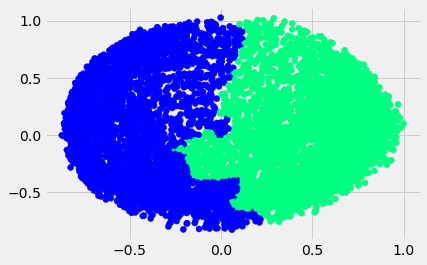

In [38]:
maxSilCluster = max(silhouette_scores, key = silhouette_scores.get)

agg = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster)
agg.fit(X_principal)

# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'], c = AgglomerativeClustering(linkage = method, n_clusters = maxSilCluster).fit_predict(X_principal), cmap = plt.cm.winter)
plt.show() 